## 거리조락 반영 -> E2SFCA -> 공원으로 바꿔보자
###
거리조락을 시간으로 바꾸자. -> 답지는 미국 기준이므로 -> 한국 기준으로 변경해야함.

In [99]:
parks = gpd.read_file('./data/도시숲전체_면_서울_최종_중분류.shp') # nas greenspace.shp

In [100]:
import geopandas as gpd
import pandas as pd
import osmnx as ox
import time
import numpy as np
from tqdm import tqdm, trange
from shapely.geometry import Point, MultiPoint
import networkx as nx
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
#from shapely.ops import cascaded_union, unary_union
import utils
import warnings
warnings.filterwarnings("ignore")

In [101]:
import os
print(os.getcwd())  # 현재 작업 디렉터리 출력


/Users/jin/Downloads/2SFCA


In [102]:
pop = pd.read_csv('./data/LOCAL_PEOPLE_20250509.csv', encoding='cp949')
# pop = pop.reset_index()
# pop.columns = ['기준일ID', '시간대구분', '행정동코드', '총생활인구수', '남자0세부터9세생활인구수',
#        '남자10세부터14세생활인구수', '남자15세부터19세생활인구수', '남자20세부터24세생활인구수',
#        '남자25세부터29세생활인구수', '남자30세부터34세생활인구수', '남자35세부터39세생활인구수',
#        '남자40세부터44세생활인구수', '남자45세부터49세생활인구수', '남자50세부터54세생활인구수',
#        '남자55세부터59세생활인구수', '남자60세부터64세생활인구수', '남자65세부터69세생활인구수', '남자70세이상생활인구수',
#        '여자0세부터9세생활인구수', '여자10세부터14세생활인구수', '여자15세부터19세생활인구수',
#        '여자20세부터24세생활인구수', '여자25세부터29세생활인구수', '여자30세부터34세생활인구수',
#        '여자35세부터39세생활인구수', '여자40세부터44세생활인구수', '여자45세부터49세생활인구수',
#        '여자50세부터54세생활인구수', '여자55세부터59세생활인구수', '여자60세부터64세생활인구수',
#        '여자65세부터69세생활인구수', '여자70세이상생활인구수','NaN']
pop

,"?""기준일ID""",시간대구분,행정동코드,집계구코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
0,20250509,0,11110515,1101072010001,586.4714,29.5831,18.8504,28.6376,10.7038,15.015,...,16.9262,19.1877,18.8278,25.0539,30.7039,24.2207,23.4848,26.0297,9.8527,30.6477
1,20250509,0,11110515,1101072010002,646.7441,8.6714,5.5254,7.4187,9.9569,25.9362,...,24.6645,26.9655,42.1877,30.1979,45.7185,33.7703,26.3983,21.3674,19.7889,58.8045
2,20250509,0,11110515,1101072010003,544.3822,32.1705,20.4991,25.2295,26.3854,10.4211,...,6.7781,10.7571,30.6213,16.4315,40.6366,26.8248,18.7789,15.414,12.7254,42.2127
3,20250509,0,11110515,1101072010004,22.1353,*,*,*,*,*,...,*,*,*,*,*,*,*,*,*,*
4,20250509,0,11110515,1101072010005,230.0979,13.3169,8.4855,10.6206,10.3971,4.505,...,*,4.7695,13.9347,7.1354,16.5488,10.889,7.9717,6.7941,5.1862,17.0416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459022,20250509,23,11740700,1125071022201,835.9834,33.851,17.0763,22.5008,11.8425,32.1117,...,33.4731,27.4596,28.2361,32.1044,53.6668,33.1693,33.3918,32.6982,25.8544,77.9975
459023,20250509,23,11740700,1125071022202,208.8763,7.2179,*,6.1149,*,8.4251,...,8.6028,6.9541,7.0286,7.7531,13.7632,8.3283,8.2746,8.2923,6.6347,20.5611
459024,20250509,23,11740700,1125071022501,862.2973,55.1454,27.8183,20.0382,17.6224,6.5735,...,29.1631,48.0979,45.5848,39.7751,49.5781,25.4719,26.0188,32.8898,15.2907,61.6968
459025,20250509,23,11740700,1125071022701,14.8689,*,*,*,*,*,...,*,*,*,*,*,*,*,*,*,*


In [103]:
pop= pop[['시간대구분','집계구코드','총생활인구수']]

In [104]:
pop

,시간대구분,집계구코드,총생활인구수
0,0,1101072010001,586.4714
1,0,1101072010002,646.7441
2,0,1101072010003,544.3822
3,0,1101072010004,22.1353
4,0,1101072010005,230.0979
...,...,...,...
459022,23,1125071022201,835.9834
459023,23,1125071022202,208.8763
459024,23,1125071022501,862.2973
459025,23,1125071022701,14.8689


In [105]:
pop['집계구코드']=pop['집계구코드'].astype(str).str[:7]

In [106]:
new_pop = pop[(pop['시간대구분'] >= 1) & 
              (pop['시간대구분'] <= 4)]


In [107]:
new_pop

,시간대구분,집계구코드,총생활인구수
19095,1,1101072,580.8824
19096,1,1101072,637.2533
19097,1,1101072,549.2267
19098,1,1101072,22.8978
19099,1,1101072,227.7167
...,...,...,...
95455,4,1125071,881.9419
95456,4,1125071,218.0692
95457,4,1125071,909.5007
95458,4,1125071,15.3889


In [108]:
real_pop= new_pop.groupby('집계구코드')['총생활인구수'].mean().reset_index()

In [109]:
real_pop

,집계구코드,총생활인구수
0,1101053,646.165247
1,1101054,819.472895
2,1101055,622.595385
3,1101056,541.615290
4,1101057,389.776531
...,...,...
419,1125070,838.039244
420,1125071,487.941971
421,1125072,463.037580
422,1125073,696.772748


<Axes: >

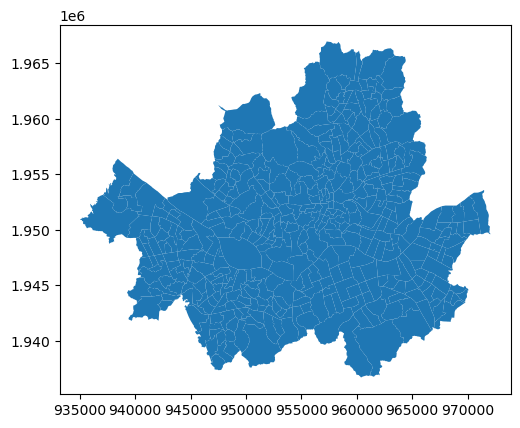

In [110]:
dong =gpd.read_file('./data/통계지역경계/행정구역.shp', encoding='cp949')
dong.plot()

In [111]:
dong

,SIDO_CD,SIDO_NM,SIGUNGU_CD,SIGUNGU_NM,ADM_CD,ADM_NM,geometry
0,11,서울특별시,11010,종로구,1101053,사직동,"POLYGON ((953553.932 1953335.741, 953555.211 1..."
1,11,서울특별시,11010,종로구,1101054,삼청동,"POLYGON ((953844.081 1955492.177, 953858.644 1..."
2,11,서울특별시,11010,종로구,1101055,부암동,"POLYGON ((952560.239 1956394.672, 952554.005 1..."
3,11,서울특별시,11010,종로구,1101056,평창동,"POLYGON ((953683.828 1959209.872, 953647.333 1..."
4,11,서울특별시,11010,종로구,1101057,무악동,"POLYGON ((952386.354 1952848.711, 952381.494 1..."
...,...,...,...,...,...,...,...
419,11,서울특별시,11250,강동구,1125070,둔촌1동,"POLYGON ((968611.972 1946736.729, 968614.219 1..."
420,11,서울특별시,11250,강동구,1125071,둔촌2동,"POLYGON ((969671.909 1948750.666, 969656.712 1..."
421,11,서울특별시,11250,강동구,1125072,암사1동,"POLYGON ((967780.213 1950660.439, 967821.733 1..."
422,11,서울특별시,11250,강동구,1125073,천호2동,"POLYGON ((966110.271 1950148.101, 966118.161 1..."


In [76]:
dong.dtypes

SIDO_CD         object
SIDO_NM         object
SIGUNGU_CD      object
SIGUNGU_NM      object
ADM_CD          object
ADM_NM          object
geometry      geometry
dtype: object

In [77]:
real_pop.dtypes

집계구코드      object
총생활인구수    float64
dtype: object

In [78]:
real_pop = real_pop.rename(columns={'집계구코드':'ADM_CD'})

In [83]:
dongs = dong.merge(real_pop, on='ADM_CD', how='left')

In [87]:
dongs

,SIDO_CD,SIDO_NM,SIGUNGU_CD,SIGUNGU_NM,ADM_CD,ADM_NM,geometry,총생활인구수
0,11,서울특별시,11010,종로구,1101053,사직동,"POLYGON ((953553.932 1953335.741, 953555.211 1...",646.165247
1,11,서울특별시,11010,종로구,1101054,삼청동,"POLYGON ((953844.081 1955492.177, 953858.644 1...",819.472895
2,11,서울특별시,11010,종로구,1101055,부암동,"POLYGON ((952560.239 1956394.672, 952554.005 1...",622.595385
3,11,서울특별시,11010,종로구,1101056,평창동,"POLYGON ((953683.828 1959209.872, 953647.333 1...",541.615290
4,11,서울특별시,11010,종로구,1101057,무악동,"POLYGON ((952386.354 1952848.711, 952381.494 1...",389.776531
...,...,...,...,...,...,...,...,...
419,11,서울특별시,11250,강동구,1125070,둔촌1동,"POLYGON ((968611.972 1946736.729, 968614.219 1...",838.039244
420,11,서울특별시,11250,강동구,1125071,둔촌2동,"POLYGON ((969671.909 1948750.666, 969656.712 1...",487.941971
421,11,서울특별시,11250,강동구,1125072,암사1동,"POLYGON ((967780.213 1950660.439, 967821.733 1...",463.037580
422,11,서울특별시,11250,강동구,1125073,천호2동,"POLYGON ((966110.271 1950148.101, 966118.161 1...",696.772748


In [113]:
print(dongs.crs)

None


In [118]:
dongs = dongs.set_crs("epsg:5179")

In [119]:
print(dongs.crs)

epsg:5179


<Axes: >

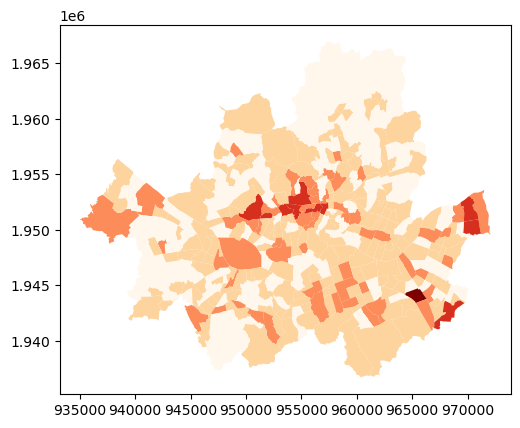

In [85]:
dongs.plot(
    column='총생활인구수',
    cmap='OrRd',
    scheme='natural_breaks')

In [120]:

parks = parks.to_crs("epsg:4326")
dongs = dongs.to_crs("epsg:4326")

dongs_list = ['Seoul, South Korea']
G = ox.graph_from_place(dongs_list, network_type='drive')
G.remove_nodes_from(list(nx.isolates(G)))

def nearest_osm(network, gdf):
    for idx, row in tqdm(gdf.iterrows(), total=gdf.shape[0]):
        if row.geometry.geom_type == 'Point':
            nearest_osm = ox.distance.nearest_nodes(network, X=row.geometry.x, Y=row.geometry.y)
        elif row.geometry.geom_type =='Polygon' or row.geometry.geom_type =='MultiPolygon': # this part can read park_polygon data type !
            nearest_osm = ox.distance.nearest_nodes(network, X=row.geometry.centroid.x, Y=row.geometry.centroid.y)
        else:
            print(row.geometry.geom_type)
            continue

        gdf.loc[idx, 'nearest_osm'] = nearest_osm
    
    return gdf

In [121]:
supply= nearest_osm(G, parks)

100%|█████████████████████████████████| 155043/155043 [2:28:59<00:00, 17.34it/s]


In [122]:
demand = nearest_osm(G, dongs)

100%|█████████████████████████████████████████| 424/424 [00:24<00:00, 17.26it/s]


In [123]:
supply_ = supply.copy(deep=True)
supply_['ratio'] = 0

In [124]:
nodes, edges = ox.graph_to_gdfs(G, nodes = True, edges = True, node_geometry = True)

In [125]:
edges['highway'].explode().unique()

array(['residential', 'tertiary', 'secondary', 'primary',
       'secondary_link', 'unclassified', 'busway', 'trunk', 'trunk_link',
       'tertiary_link', 'primary_link', 'motorway_link', 'motorway',
       'living_street', 'road', 'crossing', 'disused'], dtype=object)

In [126]:
def network_settings_kor(network):
    for u, v, data in network.edges(data=True):
        if 'maxspeed' in data.keys():
            speed_type = type(data['maxspeed'])
            if (speed_type==str):
                data['maxspeed']=float(data['maxspeed'].split()[0])
            else:
                data['maxspeed']=float(data['maxspeed'][0].split()[0])

        else:
            data['maxspeed']= 60

        data['maxspeed_meters'] = data['maxspeed'] * 16.6667  # km/h -> m/s * 0.27778 , km/h -> m/min * 16.6667
        data['time']= float(data['length']/data['maxspeed_meters'])


    for node, data in network.nodes(data=True):
        data['geometry'] = Point(data['x'],data['y'])
    
    print("network set done")
    
    return network

In [127]:
G = network_settings_kor(G)

network set done


In [128]:
nodes, edges = ox.graph_to_gdfs(G, nodes=True, edges=True, node_geometry=True)

In [129]:
edges['maxspeed'].explode().unique()

array([ 60.,  30.,  20.,  50.,  80.,  70.,  40., 100., 200.,   2., 110.,
        90.,  10.])

In [130]:
edges['time']

u            v            key
266813237    3771909762   0      0.027605
             436847094    0      0.020002
             3771899749   0      0.069877
278159482    1378780898   0      0.066892
             1378780857   0      0.022683
                                   ...   
12820401998  845976022    0      0.056915
12830468268  436825043    0      0.022473
             12830468268  0      0.203763
                          1      0.203763
12830597197  3829174145   0      0.042846
Name: time, Length: 189684, dtype: float64

In [131]:
supply_

,U2_COD,U2_NAM,Area,geometry,nearest_osm,ratio
0,110,도시숲,27.916095,"POLYGON ((127.07118 37.43062, 127.07112 37.430...",4.313280e+09,0
1,110,도시숲,427.471653,"POLYGON ((127.07047 37.43073, 127.07066 37.430...",4.313280e+09,0
2,110,도시숲,807.625803,"POLYGON ((127.07086 37.43108, 127.07086 37.431...",4.313280e+09,0
3,110,도시숲,246.678781,"POLYGON ((127.07035 37.431, 127.07033 37.431, ...",4.313280e+09,0
4,110,도시숲,80.680325,"POLYGON ((127.07016 37.43095, 127.07015 37.430...",4.313280e+09,0
...,...,...,...,...,...,...
155038,310,가로수,196.667732,"POLYGON ((127.04928 37.69094, 127.04926 37.690...",9.816197e+09,0
155039,310,가로수,13.766157,"POLYGON ((127.04494 37.69224, 127.04492 37.692...",9.816197e+09,0
155040,310,가로수,25.741987,"POLYGON ((127.04528 37.69225, 127.04526 37.692...",9.816197e+09,0
155041,310,가로수,243.289499,"POLYGON ((127.04842 37.69235, 127.0484 37.6923...",9.816197e+09,0


In [132]:
# supply_['Area_re'] = supply_['geometry'].area  # 면적 계산
supply_['normalized_area'] = supply_['Area'] / supply_['Area'].mean()  # 정규화된 면적
supply_['supply_value'] = supply_['normalized_area']  # 기본적으로 면적으로 공급량 설정
supply_

,U2_COD,U2_NAM,Area,geometry,nearest_osm,ratio,normalized_area,supply_value
0,110,도시숲,27.916095,"POLYGON ((127.07118 37.43062, 127.07112 37.430...",4.313280e+09,0,0.022677,0.022677
1,110,도시숲,427.471653,"POLYGON ((127.07047 37.43073, 127.07066 37.430...",4.313280e+09,0,0.347251,0.347251
2,110,도시숲,807.625803,"POLYGON ((127.07086 37.43108, 127.07086 37.431...",4.313280e+09,0,0.656065,0.656065
3,110,도시숲,246.678781,"POLYGON ((127.07035 37.431, 127.07033 37.431, ...",4.313280e+09,0,0.200386,0.200386
4,110,도시숲,80.680325,"POLYGON ((127.07016 37.43095, 127.07015 37.430...",4.313280e+09,0,0.065540,0.065540
...,...,...,...,...,...,...,...,...
155038,310,가로수,196.667732,"POLYGON ((127.04928 37.69094, 127.04926 37.690...",9.816197e+09,0,0.159761,0.159761
155039,310,가로수,13.766157,"POLYGON ((127.04494 37.69224, 127.04492 37.692...",9.816197e+09,0,0.011183,0.011183
155040,310,가로수,25.741987,"POLYGON ((127.04528 37.69225, 127.04526 37.692...",9.816197e+09,0,0.020911,0.020911
155041,310,가로수,243.289499,"POLYGON ((127.04842 37.69235, 127.0484 37.6923...",9.816197e+09,0,0.197633,0.197633


In [ ]:
decay_dic = {5:1, 10:0.68, 15:0.22}  # keys: time, values: weight

for i in tqdm(range(supply_.shape[0])):
    total_demand = 0
    prev_nodes = set()  # 이전 시간 구간 노드 누적
    
    # 거리 오름차순으로 정렬 (5 → 10 → 15)
    for time, weight in sorted(decay_dic.items(), key=lambda x: x[0]):
        # 현재 거리까지의 모든 노드 계산
        temp_nodes = nx.single_source_dijkstra_path_length(G, supply_.loc[i, 'nearest_osm'], cutoff=time, weight='time'
        ).keys()
        
        # 현재 구간 노드 = 전체 노드 - 이전 구간 노드
        current_nodes = set(temp_nodes) - prev_nodes
        
        # 수요 계산 및 가중치 적용
        demand_sum = demand.loc[demand['nearest_osm'].isin(current_nodes), '총생활인구수'].sum() * weight
        
        total_demand += demand_sum
        
        # 다음 구간을 위해 노드 업데이트
        prev_nodes.update(temp_nodes)
    
    # 최종 ratio 계산

    supply_value = supply_.loc[i, 'supply_value']
    step1_ratio = (supply_value / total_demand) * 100000
    supply_.loc[i, 'ratio'] = step1_ratio


    

 18%|██████                            | 27483/155043 [42:43<4:04:56,  8.68it/s]

In [ ]:
supply_

In [ ]:
demand_ = demand.copy(deep=True)
demand_['access'] =0

In [21]:
for z in tqdm(range(demand_.shape[0])):
    total_sum = 0
    prev_nodes = set()  # 이전 거리 구간 노드 누적
    
    # 거리 오름차순으로 정렬 (5->10->15)
    for time, weight in sorted(decay_dic.items(), key=lambda x: x[0]):
        # 현재 거리까지의 모든 노드 계산
        temp_nodes = nx.single_source_dijkstra_path_length(G, demand_.loc[z, 'nearest_osm'], cutoff=time, weight='time'
        ).keys()
        
        # 현재 구간 노드 = 전체 노드 - 이전 구간 노드
        current_nodes = set(temp_nodes) - prev_nodes
        
        # 공급 시설 ratio 합산 및 가중치 적용
        sum_ratio = supply_.loc[supply_['nearest_osm'].isin(current_nodes), 'ratio'].replace([np.inf, -np.inf], np.nan).dropna().sum() * weight
        
        total_sum += sum_ratio
        
        # 다음 구간을 위해 노드 업데이트
        prev_nodes.update(temp_nodes)
    
    # 최종 합계 계산
    demand_.loc[z, 'access'] = total_sum




100%|███████████████████████████████████████████| 68/68 [00:06<00:00, 10.94it/s]


In [22]:
demand_

,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,Pop,geometry,nearest_osm,access
0,11230101,Sinseol-dong,신설동,3688,"POLYGON ((127.02441 37.57919, 127.02443 37.579...",4.173043e+09,322.378830
1,11230102,Yongdu-dong,용두동,34921,"POLYGON ((127.02642 37.58055, 127.02648 37.580...",3.829262e+09,337.173396
2,11230103,Jegi-dong,제기동,22961,"POLYGON ((127.04054 37.59142, 127.04057 37.591...",3.829008e+09,358.492870
3,11230104,Jeonnong-dong,전농동,50773,"POLYGON ((127.05526 37.57574, 127.05525 37.575...",3.832324e+09,348.694813
4,11230105,Dapsipni-dong,답십리동,55187,"POLYGON ((127.05526 37.57574, 127.05527 37.575...",4.174561e+09,321.515556
...,...,...,...,...,...,...,...
63,11350102,Wolgye-dong,월계동,74440,"POLYGON ((127.05073 37.64478, 127.05093 37.644...",8.497691e+09,370.148492
64,11350103,Gongneung-dong,공릉동,77427,"POLYGON ((127.11085 37.63841, 127.1109 37.6382...",3.843481e+09,326.519898
65,11350104,Hagye-dong,하계동,47535,"POLYGON ((127.08373 37.64027, 127.0832 37.6397...",4.368644e+08,352.969786
66,11350105,Sanggye-dong,상계동,196504,"POLYGON ((127.08111 37.69614, 127.08384 37.694...",4.152034e+09,236.074138


In [23]:
demand_nor = demand_.copy(deep=True)


min_sum = demand_nor['access'].min()
max_sum = demand_nor['access'].max()
# if 문을 통해 반복을 돌린다. 이를 하지 않았더니 똑같은 값만 나왔었다.
if max_sum == min_sum:
    print('틀렸다')
else:
    demand_nor['access_normalized'] = (demand_nor['access'] - min_sum) / (max_sum - min_sum)

In [24]:
demand_nor

,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,Pop,geometry,nearest_osm,access,access_normalized
0,11230101,Sinseol-dong,신설동,3688,"POLYGON ((127.02441 37.57919, 127.02443 37.579...",4.173043e+09,322.378830,0.650145
1,11230102,Yongdu-dong,용두동,34921,"POLYGON ((127.02642 37.58055, 127.02648 37.580...",3.829262e+09,337.173396,0.729582
2,11230103,Jegi-dong,제기동,22961,"POLYGON ((127.04054 37.59142, 127.04057 37.591...",3.829008e+09,358.492870,0.844053
3,11230104,Jeonnong-dong,전농동,50773,"POLYGON ((127.05526 37.57574, 127.05525 37.575...",3.832324e+09,348.694813,0.791444
4,11230105,Dapsipni-dong,답십리동,55187,"POLYGON ((127.05526 37.57574, 127.05527 37.575...",4.174561e+09,321.515556,0.645510
...,...,...,...,...,...,...,...,...
63,11350102,Wolgye-dong,월계동,74440,"POLYGON ((127.05073 37.64478, 127.05093 37.644...",8.497691e+09,370.148492,0.906636
64,11350103,Gongneung-dong,공릉동,77427,"POLYGON ((127.11085 37.63841, 127.1109 37.6382...",3.843481e+09,326.519898,0.672380
65,11350104,Hagye-dong,하계동,47535,"POLYGON ((127.08373 37.64027, 127.0832 37.6397...",4.368644e+08,352.969786,0.814398
66,11350105,Sanggye-dong,상계동,196504,"POLYGON ((127.08111 37.69614, 127.08384 37.694...",4.152034e+09,236.074138,0.186749


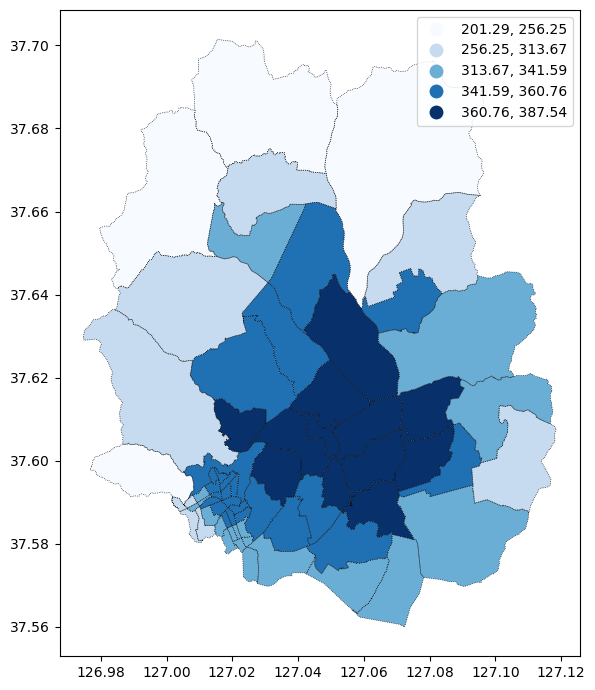

In [25]:
fig, ax = plt.subplots(figsize=(7, 7))


demand_.plot(
    column='access',
    ax=ax,
    legend=True,
    cmap='Blues',
    scheme='FisherJenks'
)
demand_.boundary.plot(
    ax=ax,
    linestyle='dotted',
    lw=0.5,
    color='black',
    zorder=1
)

plt.tight_layout()
plt.show()

